<a href="https://colab.research.google.com/github/devLarissaRodrigues/Bootcamp-DataAnalytics-WoMakersCode/blob/main/Exercicio_individual_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importação das bibliotecas:**

In [3]:
import pandas as pd
import json
import gdown
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import scipy.stats as stat

## **Carregando os dados:**

In [5]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_json('/content/drive/MyDrive/Bootcamp - WoMakersCode/enem_2023.json')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Linguagens  Ciências humanas  Ciências da natureza  Matemática     Redação  \
0  585.669300        686.512178            390.482473  452.281333  546.371706   
1  359.384608        642.084134                   NaN  412.205207  741.825256   
2  622.732384        495.510719            443.183580  669.683401  684.515750   
3  350.164605        602.041588            413.979810  676.608952  671.237114   
4  384.093657        489.249140            609.758123  520.426698  744.375048   

     Sexo  
0   Homem  
1  Mulher  
2   Homem  
3   Homem  
4   Homem  


## **Questão 01:** Qual das disciplinas tem a maior amplitude de nota?

In [6]:
# Questão 01
# Listando as colunas de disciplinas:
disciplinas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

# Calculando a amplitude de cada disciplina:
amplitudes = {disciplina:df[disciplina].max() - df[disciplina].min() for disciplina in disciplinas}
disciplina_maior_amplitude = max(amplitudes, key=amplitudes.get)
print(f'As amplitudes das disciplinas são: {amplitudes}')
print(f'A disciplina com a maior amplitude de nota é: {disciplina_maior_amplitude}')

As amplitudes das disciplinas são: {'Linguagens': 517.4563171927, 'Ciências humanas': 474.0196954613, 'Ciências da natureza': 487.60456835130003, 'Matemática': 488.0779018921, 'Redação': 729.1600351395}
A disciplina com a maior amplitude de nota é: Redação


## **Questão 02:** : Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [7]:
# Questão 02
# Calcular média e mediana, ignorando valores nulos
medias = df[disciplinas].mean()
medianas = df[disciplinas].median(skipna=True)

# Criar um DataFrame para exibir os resultados
resultado = pd.DataFrame({'Média': medias, 'Mediana': medianas})
print(resultado)


                           Média     Mediana
Linguagens            514.524809  515.045250
Ciências humanas      527.042281  524.519920
Ciências da natureza  499.315583  500.479263
Matemática            535.965660  533.247767
Redação               637.783532  635.273973


## **Questão 03:** Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:
### a. Redação - 2
### b. Matemática e suas Tecnologias - 4
### c. Linguagens, Códigos e suas Tecnologias - 2
### d. Ciências Humanas e suas Tecnologias - 1
### e. Ciências da Natureza e suas Tecnologias - 1
### **Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?**

In [8]:
# Questão 3:
# Definir os pesos das disciplinas
pesos = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1
}

# Calcular a nota ponderada para cada estudante
df['Nota Final'] = sum(df[disciplina] * peso for disciplina, peso in pesos.items())

# Selecionar os 500 melhores estudantes
top_500 = df.nlargest(500, 'Nota Final')

# Calcular média e desvio padrão
media_top500 = top_500['Nota Final'].mean()
desvio_padrao_top500 = top_500['Nota Final'].std()

print(f'Média dos 500 melhores estudantes: {media_top500:.2f}')
print(f'Desvio padrão dos 500 melhores estudantes: {desvio_padrao_top500:.2f}')

Média dos 500 melhores estudantes: 5572.90
Desvio padrão dos 500 melhores estudantes: 404.36


## **Questão 04:**  Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [9]:
# Questão 4:
# Selecionar os 40 primeiros colocados
top_40 = top_500.nlargest(40, 'Nota Final')

# Calcular média e variância
media_top40 = top_40['Nota Final'].mean()
variancia_top40 = top_40['Nota Final'].var()

print(f'Média dos 40 estudantes aprovados: {media_top40:.2f}')
print(f'Variância das notas dos aprovados: {variancia_top40:.2f}')


Média dos 40 estudantes aprovados: 6366.83
Variância das notas dos aprovados: 29576.75


## **Questão 05:**  Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [10]:
# Questão 5:
q3_matematica = df['Matemática'].quantile(0.75)
q3_linguagens = df['Linguagens'].quantile(0.75)

print(f'Terceiro quartil de Matemática: {q3_matematica:.2f}')
print(f'Terceiro quartil de Linguagens: {q3_linguagens:.2f}')


Terceiro quartil de Matemática: 592.91
Terceiro quartil de Linguagens: 571.64


## **Questão 06:** Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?


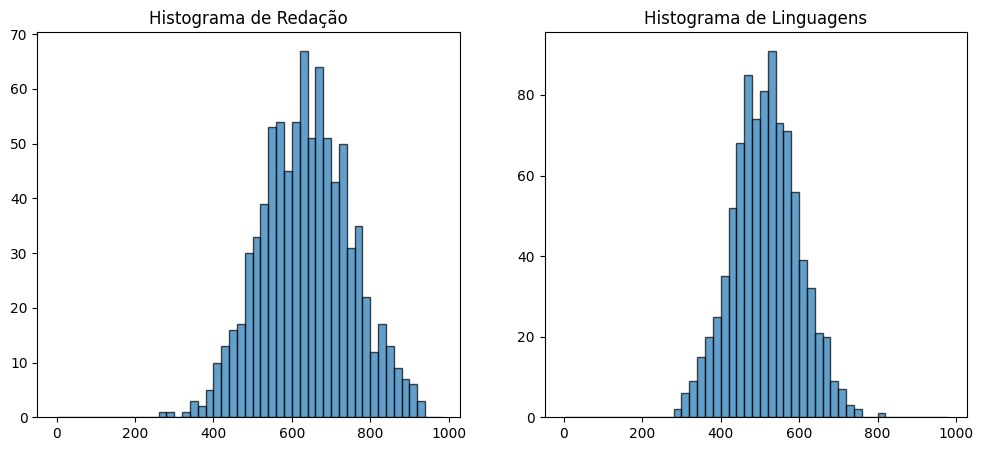

Assimetria de Redação: 0.07
Assimetria de Linguagens: 0.08
Justificativa: Sim, podemos dizer que os histogramas de Redação e Linguagens são próximos de simétricos.
A assimetria de ambas as distribuições é muito pequena (0.07 para Redação e 0.08 para Linguagens), indicando uma leve inclinação para a direita, mas de forma quase imperceptível
Isso significa que a maioria das notas está concentrada ao redor da média, com apenas uma pequena quantidade de notas mais altas. Portanto, podemos classificar as distribuições como quase simétricas, sem grandes distorções.


In [11]:
# Questão 6:
plt.figure(figsize=(12, 5))

# Histograma de Redação
plt.subplot(1, 2, 1)
plt.hist(df['Redação'].dropna(), bins=range(0, 1000, 20), edgecolor='black', alpha=0.7)
plt.title('Histograma de Redação')

# Histograma de Linguagens
plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'].dropna(), bins=range(0, 1000, 20), edgecolor='black', alpha=0.7)
plt.title('Histograma de Linguagens')

plt.show()

# Sobre as assimetrias:
assimetria_redacao = stat.skew(df['Redação'].dropna())
assimetria_linguagens = stat.skew(df['Linguagens'].dropna())

print(f'Assimetria de Redação: {assimetria_redacao:.2f}')
print(f'Assimetria de Linguagens: {assimetria_linguagens:.2f}')
print("Justificativa: Sim, podemos dizer que os histogramas de Redação e Linguagens são próximos de simétricos.")
print("A assimetria de ambas as distribuições é muito pequena (0.07 para Redação e 0.08 para Linguagens), indicando uma leve inclinação para a direita, mas de forma quase imperceptível")
print("Isso significa que a maioria das notas está concentrada ao redor da média, com apenas uma pequena quantidade de notas mais altas. Portanto, podemos classificar as distribuições como quase simétricas, sem grandes distorções.")



## **Questão 07:**  Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

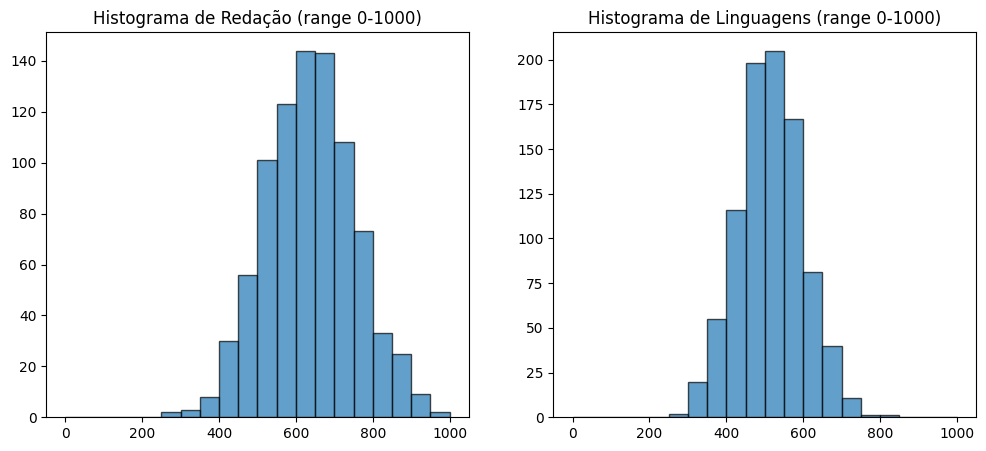

In [12]:
# Questão 7:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Redação'].dropna(), bins=20, range=[0, 1000], edgecolor='black', alpha=0.7)
plt.title('Histograma de Redação (range 0-1000)')

plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'].dropna(), bins=20, range=[0, 1000], edgecolor='black', alpha=0.7)
plt.title('Histograma de Linguagens (range 0-1000)')

plt.show()
print("Justificativa: Não. Agora pode-se observar que não é tão simétrico como os histogramas anteriores.")


## **Questão 08:**  Faça um boxplot para as notas de Ciências da Natureza e Redação, analisando os quartis e identificando possíveis outliers. Utilize o método IQR (Intervalo Interquartílico) para essa análise.

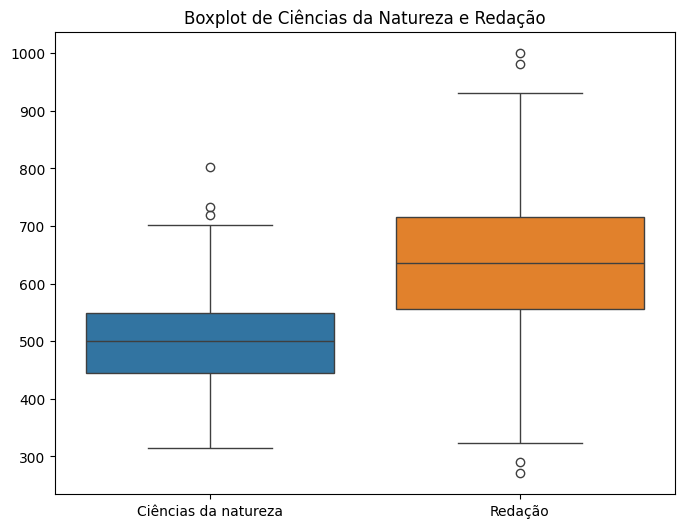

A disciplina Ciências da natureza tem 3 outliers.
A disciplina Redação tem 4 outliers.


In [ ]:
# Questão 8:
plt.figure(figsize=(8, 6))
sbn.boxplot(data=df[['Ciências da natureza', 'Redação']])
plt.title('Boxplot de Ciências da Natureza e Redação')
plt.show()

for disciplina in ['Ciências da natureza', 'Redação']:
    Q1 = df[disciplina].quantile(0.25)
    Q3 = df[disciplina].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[disciplina] < limite_inferior) | (df[disciplina] > limite_superior)]
    print(f'A disciplina {disciplina} tem {len(outliers)} outliers.')



## **Questão 09:** Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [ ]:
# Questão 9:
df_sem_outliers = df.copy()

for disciplina in ['Ciências da natureza', 'Redação']:
    Q1 = df[disciplina].quantile(0.25)
    Q3 = df[disciplina].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_sem_outliers = df_sem_outliers[
        (df_sem_outliers[disciplina] >= limite_inferior) & (df_sem_outliers[disciplina] <= limite_superior)
    ]

# Comparar médias
media_original = df[['Ciências da natureza', 'Redação']].mean()
media_sem_outliers = df_sem_outliers[['Ciências da natureza', 'Redação']].mean()

impacto = abs((media_sem_outliers - media_original) / media_original) * 100
print(f'Impacto na média após remoção dos outliers: \n{impacto}')

# Verificar se impacto é maior que 5%
if any(impacto > 5):
    print("A remoção dos outliers impacta significativamente a média.")
else:
    print("A remoção dos outliers NÃO impacta significativamente a média.")


Impacto na média após remoção dos outliers: 
Ciências da natureza    0.299276
Redação                 0.009606
dtype: float64
A remoção dos outliers NÃO impacta significativamente a média.


## **Questão 10:**  Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
# Questão 10:
# Substituir valores NaN por média, mediana e moda
df_media = df.fillna(df[disciplinas].mean())
df_mediana = df.fillna(df[disciplinas].median())

# Para moda, garantir que mode() retorne um valor válido
moda_values = df[disciplinas].mode().iloc[0] if not df[disciplinas].mode().empty else df[disciplinas].median()
df_moda = df.fillna(moda_values)

# Função para comparar impacto
def comparar_impacto(df_original, df_alterado, metodo):
    media_original = df_original[disciplinas].mean()
    desvio_original = df_original[disciplinas].std()

    media_alterada = df_alterado[disciplinas].mean()
    desvio_alterado = df_alterado[disciplinas].std()

    impacto_media = abs((media_alterada - media_original) / media_original) * 100
    impacto_desvio = abs((desvio_alterado - desvio_original) / desvio_original) * 100

    print(f"Impacto ao substituir por {metodo}:\nMédia: {impacto_media.mean():.2f}%\nDesvio Padrão: {impacto_desvio.mean():.2f}%\n")

comparar_impacto(df, df_media, 'Média')
comparar_impacto(df, df_mediana, 'Mediana')
comparar_impacto(df, df_moda, 'Moda')


Impacto ao substituir por Média:
Média: 0.00%
Desvio Padrão: 5.79%

Impacto ao substituir por Mediana:
Média: 0.04%
Desvio Padrão: 5.79%

Impacto ao substituir por Moda:
Média: 5.01%
Desvio Padrão: 27.20%

